# Project - Handwritten Digits Recognition

---

This notebook contains the project of [Deep Reinforcement Learning](https://esiee.blackboard.com/webapps/blackboard/content/listContent.jsp?course_id=_11105_1&content_id=_147011_1&mode=reset).

---

The main objective is to classify "*handwritten digits*". To do so, it will be done through two networks:

- multilayer network
- convolutional multilayer network

---

# 1. MNSIT datset

The first step is to retrieve the MNSIT dataset. To that end, we need to import "keras.datasets" to get the dataset "mnsit":

In [113]:
# Import the library to import the data
from keras.datasets import mnist

Then, we retrive the training and test set. Each set is a tuple of images and labels. Then, we need to adapt the code to retrieve both tuples:

In [114]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- `train_images` : training set of images
- `test_images` : test set of images
- `train_labels` : training set of labels related to the images of the training set
- `test_labels` : test set of labels related to the images of the test set

In [115]:
# Information about images format
print(f"The training_set's images format is: {train_images.shape} and the type of it is: {type(train_images)}")
print(f"The test_set's images format is: {test_images.shape} and the type of it is: {type(test_images)}")

print('\n')

# Information about labels format
print(f"The training_set's labels format is: {train_labels.shape} and the type of it is: {type(train_labels)}")
print(f"The test_set's labels format is: {test_labels.shape} and the type of it is: {type(test_labels)}")

print('\n')

# Information about pixels format
print(f"The number of pixels per image is: {train_images.shape[1] * train_images.shape[2]} and the type of one is: {train_images[1].shape}")

The training_set's images format is: (60000, 28, 28) and the type of it is: <class 'numpy.ndarray'>
The test_set's images format is: (10000, 28, 28) and the type of it is: <class 'numpy.ndarray'>


The training_set's labels format is: (60000,) and the type of it is: <class 'numpy.ndarray'>
The test_set's labels format is: (10000,) and the type of it is: <class 'numpy.ndarray'>


The number of pixels per image is: 784 and the type of one is: (28, 28)


Those images are encoded as numpy arrays (or tensors) and the labels are simply an array of digits, ranging from "0" to "9":

<bR>

For the images, we have 60.000 training observations, and 10.000 test ones of 28x28 pixels.

For the labels, we have 60.000 training observations, and 10.000 test ones of 1 value which is the output expected.

<br>

We can spend some time to analyze the 10 first elements of the training set. To get that done, we will need two more librarieis wich are "pyplot" in "matplotlib" to display the images, and "numpy" to format the images:

In [116]:
# Import libraries to plot the images
import matplotlib.pyplot as plt
import numpy as np

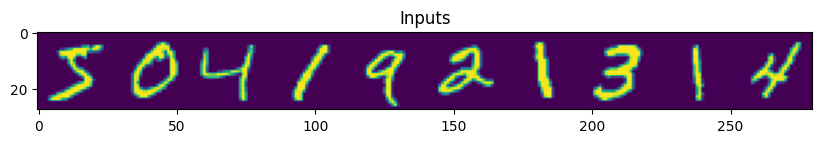

Labels: [5 0 4 1 9 2 1 3 1 4]


In [117]:
# Number of element to retrieve
batch_size = 10

# Inputs (28x28 pixels from each image) and Ouputs (labels)
inputs = train_images[0:batch_size,:,:]
outputs = train_labels[0:batch_size]

# Define the figsize
plt.figure(figsize=(10,5))

# Display the images horizontally
plt.imshow(np.hstack([inputs[i,:,:] for i in range(inputs.shape[0])]))

# Define the title and display the full plotly image
plt.title("Inputs")
plt.show()

# Print the outputs under the inputs' images
print("Labels: " + str(outputs))

---

# 2. Classification by multilayer network (MLP):

To build our network, we will put 2 "dense" hidden layers after the "input" layer. A dense layer is a fully connected one such as the following one:

<br> <center>

![Fully connected layer](https://www.gabormelli.com/RKB/images/thumb/4/44/2layersFCNN.png/300px-2layersFCNN.png)

</center><br>

Then for each neuron in each hidden layer looks like this:

<br><center>

![Neuron](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=568&h=303)

</center><br>

The input layer of the neural network receives pixel values of the input image. Each neuron in this layer corresponds to a pixel in the image.

<br>

The first hidden layer is supposed to apply a "Rectified Linear Unit (ReLU)" which is an activation function. Its equation is the following one "$f(x) = max(x,0)$". Then, we apply a second hidden layer which returns the output (label) using the "softmax" function useful for multi-class classification.

<br>

To realize our networks, we are likely to use the library "keras":

In [118]:
# Import keras to build our convolutional network
from keras import models
from keras import layers

We define here the neural network model:

In [119]:
# Create the network
network = models.Sequential()

# Add a dense layer with "ReLU" activation
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Add a dense layer with "softmax" activation
network.add(layers.Dense(10, activation='softmax'))

With the network architecture defined, the parameters of all layers are filled with random values. From now on, we need to gradually adjust these parameters, based on the available data. That's where the *training_set* will be usefull.

<br>

To adjust the network we need to more caracteristics:

- **Loss function**: to improve the neural network, we need to measure the difference between the output and the expected one through the "loss function". As we are applying for a multi-class classification, we will go for a categorial cross-entropy.

- **Optimizer.**: to adjust the weights, it will help to use this score as a feedback. It will, in a way, lower the loss score. It implements the *Backpropagation* algorithm.

In [120]:
# Adjust the network with an optimizer and a loss function
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Before training, we preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in  the `[0, 1]` interval (by doing this, it will improve the computation time).

<br>

Moreover, our training images are stored in an array of shape `(60000, 28, 28)` of type `uint8` with  values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [121]:
# Transform the shapes of images of (X, 28, 28) to (X, 28 * 28)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalize the values from the original values [0, 255] to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

As the labels are the output expected, they must be converted to `categorical` variables. Then, the cross-entropy loss that expects `categorical` values to be 'One-Hot-Encoded':

In [122]:
# Import the module that convert the type of a variable to categorical
from keras.utils import to_categorical

In [123]:
# Convert numpy.ndarray of float32 to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

As we have built the convolution network with the hidden layers and the input layer, we can now train it on the "`train_images`" and "`train_labels`". The "`epochs`" are the number of iteration where the model will be trained, and the "`batch_size`" is the number of sample from the "`train_set`". To reduce overfitting the training set will be split according to 70/30 split:

In [125]:
# Retrieve information on the built network
history = network.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_split=0.3)

Epoch 1/10
42/42 [==============================] - 2s 45ms/step - loss: 0.6747 - accuracy: 0.8212 - val_loss: 0.3037 - val_accuracy: 0.9147
Epoch 2/10
42/42 [==============================] - 2s 40ms/step - loss: 0.2646 - accuracy: 0.9258 - val_loss: 0.2341 - val_accuracy: 0.9349
Epoch 3/10
42/42 [==============================] - 2s 41ms/step - loss: 0.2050 - accuracy: 0.9429 - val_loss: 0.1948 - val_accuracy: 0.9451
Epoch 4/10
42/42 [==============================] - 2s 41ms/step - loss: 0.1664 - accuracy: 0.9538 - val_loss: 0.1701 - val_accuracy: 0.9523
Epoch 5/10
42/42 [==============================] - 2s 40ms/step - loss: 0.1381 - accuracy: 0.9620 - val_loss: 0.1533 - val_accuracy: 0.9571
Epoch 6/10
42/42 [==============================] - 3s 68ms/step - loss: 0.1175 - accuracy: 0.9678 - val_loss: 0.1370 - val_accuracy: 0.9615
Epoch 7/10
42/42 [==============================] - 2s 42ms/step - loss: 0.1012 - accuracy: 0.9730 - val_loss: 0.1296 - val_accuracy: 0.9629
Epoch 8/10
42

As we have the numerical values, we can plot both loss and accuracy according to the epochs through plotly:

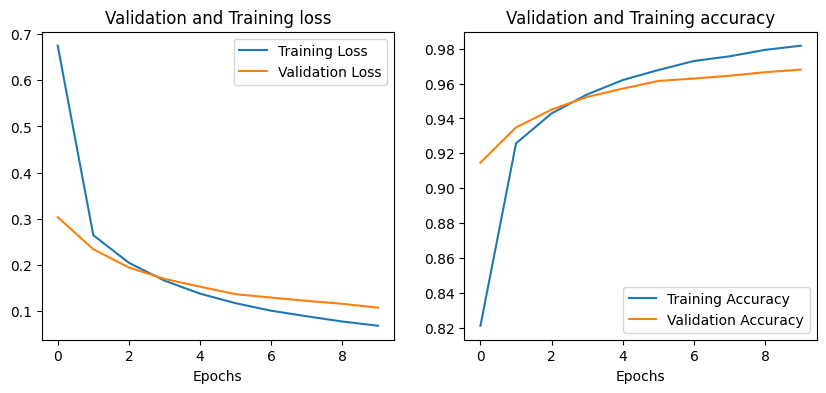

In [136]:
# Create the graph cells and the size of it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Define the training and validation loss according to the epochs
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Validation and Training loss')
ax1.set_xlabel('Epochs')
ax1.legend()

# Define the training accurarcy according to the epochs
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Validation and Training accuracy')
ax2.set_xlabel('Epochs')
ax2.legend()

By now, we want to realise a prediction to ensure the quality of our model on a new input:

In [137]:
# Realise the prediction with our "network" and the "test_images"
predictions = network.predict(test_images)

313/313 [==============================] - 1s 2ms/step


If we take a closer look to the predictions, each one represents for each number the probability that the image input match the number. Then, for each prediction, we will get an array of 10 numerical element:

In [138]:
# Display information about the predictions
print(f"The number of predictions is : {predictions.shape[0]} \n")
print(f"Each predictions contains : {len(predictions[0])} \n")
print(f"The sum of predictions must be 1 as it represent probabilities. For example, for the first observation, the sum is : {np.sum(predictions[0]):.1f} \n")
print(f"The format of one prediction is the following one: ")
print(predictions[0])

The number of predictions is : 10000 

Each predictions contains : 10 

The sum of predictions must be 1 as it represent probabilities. For example, for the first observation, the sum is : 1.0 

The format of one prediction is the following one: 
[5.2937967e-06 7.8830897e-07 1.5488871e-04 3.5701916e-03 1.6195973e-07
 2.2154698e-05 2.4564581e-09 9.9612945e-01 1.7893799e-05 9.9166115e-05]


If we want to mathematically show if the prediction match the expected output (label), we can plot the image and the probability related to it:

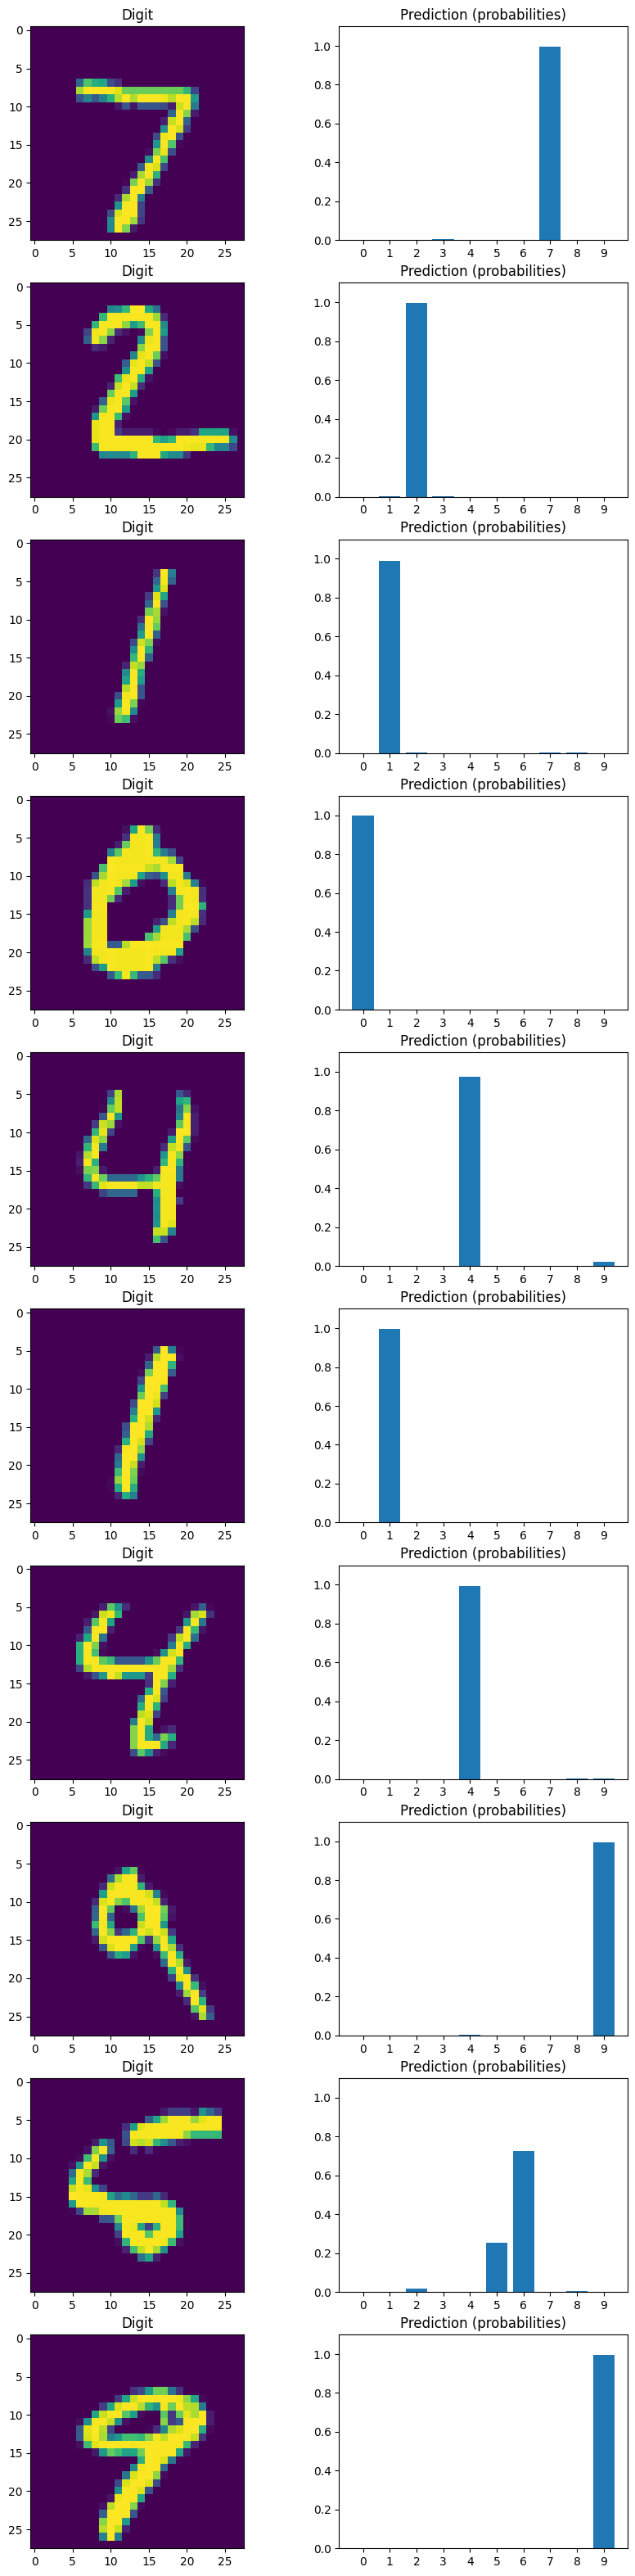

In [139]:
# Define the value to begin a ten values interval
n = 0

# Retrieve the real format of the input and the matching output
inputs  = test_images[n*batch_size : (n+1)*batch_size,:].reshape(batch_size, 28, 28)
outputs = predictions[n*batch_size : (n+1)*batch_size,:]

# Create the graph cells and the size of it
f, ax = plt.subplots(batch_size, 2, figsize=(10, 4 * batch_size))

# For the number of sample, plot the input and the graph of the prediction
for i in range(batch_size):
    ax[i,0].imshow(inputs[i,:,:])
    ax[i,0].set_title("Digit")
    ax[i,1].bar(range(10), outputs[i,:])
    ax[i,1].set_title("Prediction (probabilities)")
    ax[i,1].set_xticks(range(10))
    ax[i,1].set_ylim((0,1.1))

We trained our model and test it on our "`test_set`". Now we can, thanks to "`keras`", evaluate the "loss" and "accuracy" as we did on the "`training_set`" during the creation of the model:

In [140]:
# Retrieve the test loss and accurary
test_loss, test_acc = network.evaluate(test_images, test_labels)

# Display the test loss and accurary
print(f"\n The loss for the test_set is : {test_loss:.3f}. The accuracy of the test_set is : {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9723

 The loss for the test_set is : 0.094. The accuracy of the test_set is : 0.972


As the accuracy is a little bit lower for the test than train set, it means that there is an "overfitting". However, it is not a significant one.

<br>

---

# 3. Convolutional Neural Network (CNN):

We will now on build a convolutional neural network also known as CNN. Here is an explanation of it:

## Convolutional layers

ConvNets take advantage of the fact that the input consists of images, and they constrain the architecture in a more sensible way. To do so, they make use of convolutional layers. The fundamental difference is this: fully-connected layers learn global patterns in the inputs, whereas convolution layers learn local patterns in small 2D windows of the inputs. More specifically, a convolution layer operates over 3D tensors with two spatial axes and a depth axis (height, width, channels). The convolution operation extracts patches from its input, and applies the same transformation to all of these patches. The output is still a 3D tensor, but its dimensions depend on the layer's hyper-parameters, specified by the *kernel size* and the *number of kernels*.

<center>

![conv2.jpeg](https://www.jeremyjordan.me/content/images/2017/07/Screen-Shot-2017-07-26-at-1.44.58-PM.png)

</center>

## ConvNet architecture

ConvNets mainly use three types of layers: convolutional (CONV), pooling (POOL), fully-connected (FC). The figure below shows a concrete example of ConvNet architecture. The first layer (left) stores the raw image pixels, whereas and the last layer (right) stores the class probabilities. The activation of each hidden layer along the processing path is shown as a column.

<center>

![convnet.jpeg](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

</center>

To build our CNN, we will then start by defining each convolutional layer and seperate them with pooling to down-sample the spatial dimensions:



In [141]:
# We build our CNN as Layer - Pooling - Layer - Pooling - Layer - Flatten - Neural Network as we already dit
model_cnn = models.Sequential()

# First couple layer/pooling with 32 neurons (our images (28*28 pixels) will fit the format (28, 28, channel (= 1 for the input layer)))
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(layers.MaxPooling2D((2, 2)))

# Second couple layer/pooling with 64 neurons
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))

# Last couple so layer then flatten it to send it in a fully connected neural network
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.Flatten())

# Fully connected neural network that returns an array of 10 probabilities
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

# Display the architecture of the CNN
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)             

As we previously did, we define an optimizer and a loss function:

In [142]:
# Define the optimizer and the loss function
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Then, we need to preprocess our data to send them in our "CNN" model:

<br>

(We will retrieve the data from scratch to ensure no conflitct while running the jupyter notebook)

In [143]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Transform the shapes of images of (X, 28, 28) to (X, 28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images  =  test_images.reshape((10000, 28, 28, 1))

# Normalize the values from the original values [0, 255] to [0, 1]
train_images = train_images.astype('float32') / 255
test_images  =  test_images.astype('float32') / 255

# Convert numpy.ndarray of float32 to categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical( test_labels)

Then we will fit the model. By the end, "model_cnn" will be able to realise prediction of handwritten digit. Of course, we will pay attention to its performance:

<br>

N.B. As the CNN is more complex, it will take a long time according to the runtime of a classical multilayer network...

In [144]:
# Retrieve information on the built network
history_cnn = model_cnn.fit(train_images, train_labels, epochs = 5, batch_size = 64, validation_split = 0.3)

Epoch 1/5
657/657 [==============================] - 42s 62ms/step - loss: 0.2324 - accuracy: 0.9307 - val_loss: 0.0923 - val_accuracy: 0.9724
Epoch 2/5
657/657 [==============================] - 45s 68ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0517 - val_accuracy: 0.9841
Epoch 3/5
657/657 [==============================] - 37s 57ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 4/5
657/657 [==============================] - 43s 65ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0575 - val_accuracy: 0.9831
Epoch 5/5
657/657 [==============================] - 39s 59ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0498 - val_accuracy: 0.9848


We are gonna evalute the performance of the training and validation set:

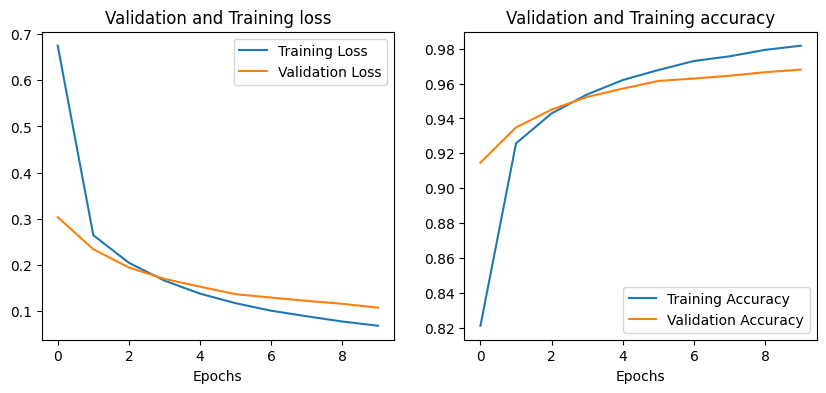

In [146]:
# Create the graph cells and the size of it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Define the training and validation loss according to the epochs
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Validation and Training loss')
ax1.set_xlabel('Epochs')
ax1.legend()

# Define the training accurarcy according to the epochs
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Validation and Training accuracy')
ax2.set_xlabel('Epochs')
ax2.legend()

We realise the predictions as we previously did and evalute the performance:

In [147]:
# Realise the prediction with our "network" and the "test_images"
predictions_cnn = model_cnn.predict(test_images)

313/313 [==============================] - 3s 9ms/step


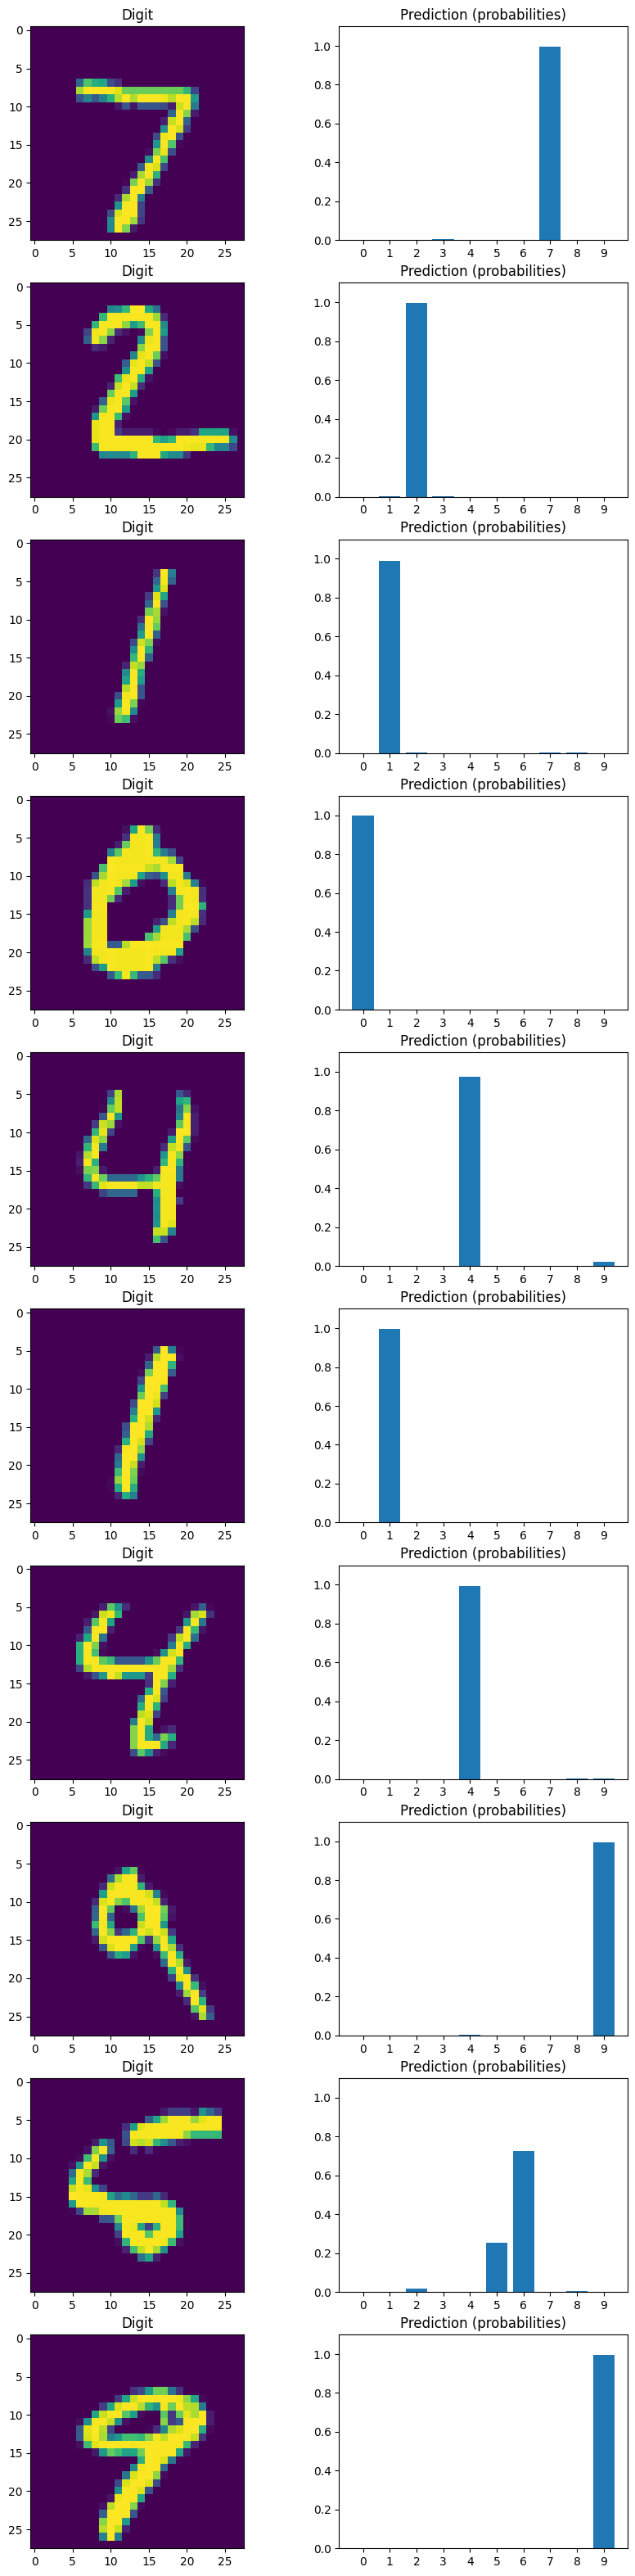

In [148]:
# Define the value to begin a ten values interval
n = 0

# Retrieve the real format of the input and the matching output
inputs  = test_images[n*batch_size : (n+1)*batch_size,:].reshape(batch_size, 28, 28)
outputs = predictions[n*batch_size : (n+1)*batch_size,:]

# Create the graph cells and the size of it
f, ax = plt.subplots(batch_size, 2, figsize=(10, 4 * batch_size))

# For the number of sample, plot the input and the graph of the prediction
for i in range(batch_size):
    ax[i,0].imshow(inputs[i,:,:])
    ax[i,0].set_title("Digit")
    ax[i,1].bar(range(10), outputs[i,:])
    ax[i,1].set_title("Prediction (probabilities)")
    ax[i,1].set_xticks(range(10))
    ax[i,1].set_ylim((0,1.1))

In [150]:
# Retrieve the test loss and accurary
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)

# Display the test loss and accurary
print(f"\n The loss for the test_set is : {test_loss:.3f}. The accuracy of the test_set is : {test_acc:.3f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0363 - accuracy: 0.9878

 The loss for the test_set is : 0.036. The accuracy of the test_set is : 0.988


According to our previous model, it improves quite well especially when the accuracy is that high. Indeed, over the "0.028" missing accuracy, we are missing "0.012". The error has been split by more than 2 which is great when we do not see that much "overfitting".